<a href="https://colab.research.google.com/github/saniagonsalves/DM_GBM/blob/main/1_gradient_boost_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name- Sania Gonsalves

**XGBoost**

Dataset link- https://drive.google.com/drive/folders/1JqnTCYNuoEIkzsl4e3J-nHHuYa_N_Qpn?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import dataset

data = '/content/Wholesale customers data.csv'
df = pd.read_csv(data)

Exploratory Data Analysis

In [ ]:
df.shape

(440, 8)

Preview dataset

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Check for missing values

In [ ]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Declare feature vector and target variable

In [ ]:
X = df.drop('Channel', axis=1)

y = df['Channel']

feature vector(X) and target variable(y)

In [ ]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [ ]:
y.head()

0    2
1    2
2    2
3    1
4    2
Name: Channel, dtype: int64

We can see that the y labels contain values as 1 and 2. To convert it into 0 and 1 for further analysis. 

In [ ]:
# convert labels into binary values
y[y == 2] = 0
y[y == 1] = 1

In [ ]:
# again preview the y label
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains.

In [ ]:
# import XGBoost
import xgboost as xgb
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**XGBoost classifier**

In [ ]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }
            
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, learning_rate=1.0, max_depth=4)

In [ ]:
# alternatively view the parameters of the xgb trained model
print(xgb_clf)

XGBClassifier(alpha=10, learning_rate=1.0, max_depth=4)


Make predictions with **XGBoost Classifier**

In [ ]:
# make predictions on test data
y_pred = xgb_clf.predict(X_test)

Check accuracy score

In [ ]:
# check accuracy score
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.9167


k-fold Cross Validation using XGBoost

In [ ]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [ ]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.917860,0.006809,0.888360,0.037170
1,0.920484,0.011244,0.886998,0.037300
2,0.931564,0.003005,0.882138,0.041967
3,0.943088,0.017875,0.891426,0.053799
4,0.940179,0.024116,0.885100,0.055394


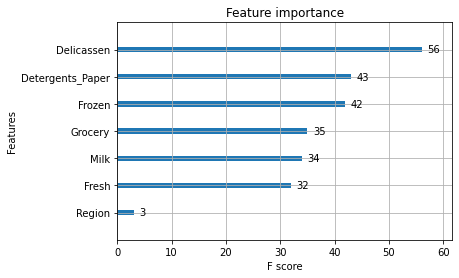

In [ ]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

In [ ]:
!pip install -q hvplot

In [ ]:
import pandas as pd
import numpy as np
from time import time
import hvplot.pandas
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/collegedata.csv')
data.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
data.loc[data.grad_rate > 100, 'grad_rate'] = 100

In [ ]:
accuracy = {}
speed = {}

X = data.drop('private', axis=1)
y = data.private

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = GradientBoostingClassifier()

start = time()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
score = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

speed['GradientBoosting'] = np.round(time() - start, 3)
accuracy['GradientBoosting'] = (np.mean(score) * 100).round(3)

print(f"Mean Accuracy: {accuracy['GradientBoosting']}\nSTD: {np.std(score):.3f}\nRun Time: {speed['GradientBoosting']}s")

Mean Accuracy: 94.002
STD: 0.020
Run Time: 5.483s


**XGBoost**

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()

start = time()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
score = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

speed['XGBoost'] = np.round(time() - start, 3)
accuracy['XGBoost'] = (np.mean(score) * 100).round(3)

print(f"Mean Accuracy: {accuracy['XGBoost']}\nSTD: {np.std(score):.3f}\nRun Time: {speed['XGBoost']}s")

Mean Accuracy: 94.363
STD: 0.018
Run Time: 1.748s


**LightGBM**

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()

start = time()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
score = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

speed['LGBM'] = np.round(time() - start, 3)
accuracy['LGBM'] = (np.mean(score) * 100).round(3)

print(f"Mean Accuracy: {accuracy['LGBM']}\nSTD: {np.std(score):.3f}\nRun Time: {speed['LGBM']}s")

Mean Accuracy: 94.26
STD: 0.016
Run Time: 2.222s


**CatBoost**

In [ ]:
!pip3 install catboost

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()

start = time()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
score = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

speed['CatBoost'] = np.round(time() - start, 3)
accuracy['CatBoost'] = (np.mean(score) * 100).round(3)

print(f"Mean Accuracy: {accuracy['CatBoost']}\nSTD: {np.std(score):.3f}\nRun Time: {speed['CatBoost']}s")

Mean Accuracy: 94.414
STD: 0.015
Run Time: 117.083s


**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()

start = time()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
score = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

speed['AdaBoost'] = np.round(time() - start, 3)
accuracy['AdaBoost'] = (np.mean(score) * 100).round(3)

print(f"Mean Accuracy: {accuracy['AdaBoost']}\nSTD: {np.std(score):.3f}\nRun Time: {speed['AdaBoost']}s")

Mean Accuracy: 93.461
STD: 0.015
Run Time: 3.149s


In [ ]:
for algo, result in accuracy.items():
    print(f"{algo:{20}}: Score: {result}, Speed: {speed[algo]}")

GradientBoosting    : Score: 94.002, Speed: 5.483
XGBoost             : Score: 94.363, Speed: 1.748
LGBM                : Score: 94.26, Speed: 2.222
CatBoost            : Score: 94.414, Speed: 117.083
AdaBoost            : Score: 93.461, Speed: 3.149


In [ ]:
from fastai.imports import *
from IPython.display import display
from sklearn import metrics

In [ ]:
def std_agg(cnt, s1, s2): return math.sqrt((s2/cnt) - (s1/cnt)**2)

**DecisionTree**

In [ ]:
class DecisionTree():
    def __init__(self, x, y, idxs = None, min_leaf=2):
        if idxs is None: idxs=np.arange(len(y))
        self.x,self.y,self.idxs,self.min_leaf = x,y,idxs,min_leaf
        self.n,self.c = len(idxs), x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for i in range(self.c): self.find_better_split(i)
        if self.score == float('inf'): return
        x = self.split_col
        lhs = np.nonzero(x<=self.split)[0]
        rhs = np.nonzero(x>self.split)[0]
        self.lhs = DecisionTree(self.x, self.y, self.idxs[lhs])
        self.rhs = DecisionTree(self.x, self.y, self.idxs[rhs])

    def find_better_split(self, var_idx):
        x,y = self.x.values[self.idxs,var_idx], self.y[self.idxs]
        sort_idx = np.argsort(x)
        sort_y,sort_x = y[sort_idx], x[sort_idx]
        rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

        for i in range(0,self.n-self.min_leaf-1):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i<self.min_leaf or xi==sort_x[i+1]:
                continue

            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.var_idx,self.score,self.split = var_idx,curr_score,xi

    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf')
    
    def __repr__(self):
        s = f'n: {self.n}; val:{self.val}'
        if not self.is_leaf:
            s += f'; score:{self.score}; split:{self.split}; var:{self.split_name}'
        return s

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
        return t.predict_row(xi)

In [ ]:
x = np.arange(0,50)
x = pd.DataFrame({'x':x})

In [ ]:
# just random uniform distributions in differnt range

y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)

y = np.concatenate((y1,y2,y3,y4,y5))
y = y[:,None]


In [ ]:
x.shape, y.shape

((50, 1), (50, 1))

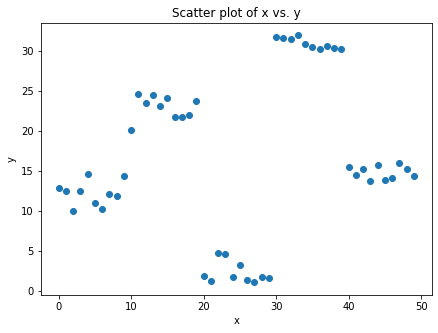

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(x,y, 'o')
plt.title("Scatter plot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**Gradient Boosting DecisionTrees in a loop**



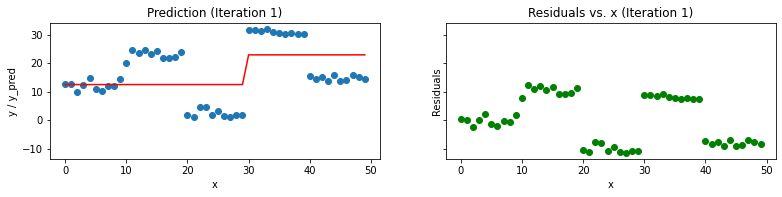

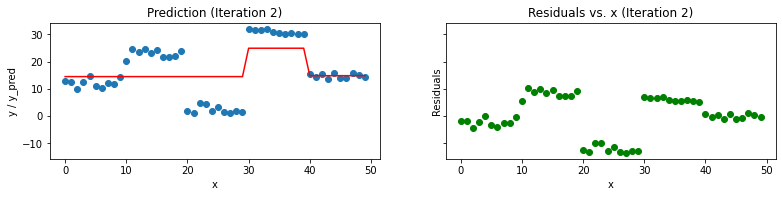

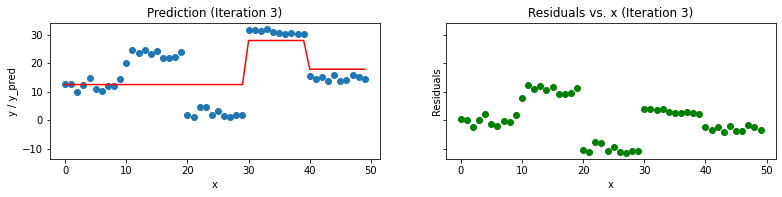

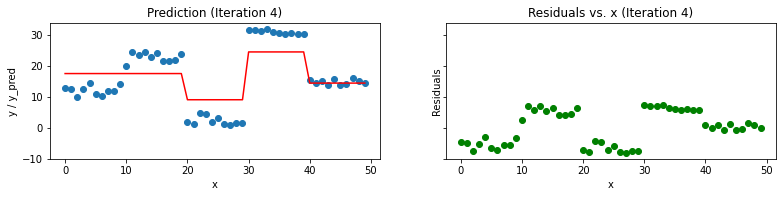

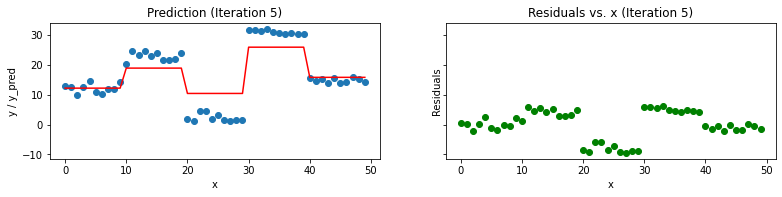

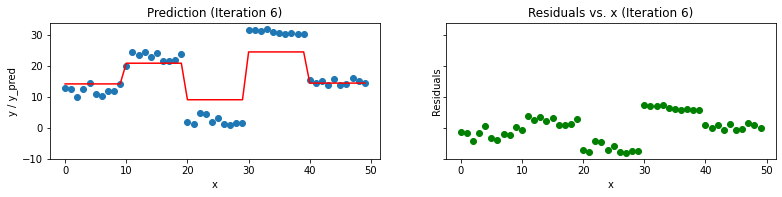

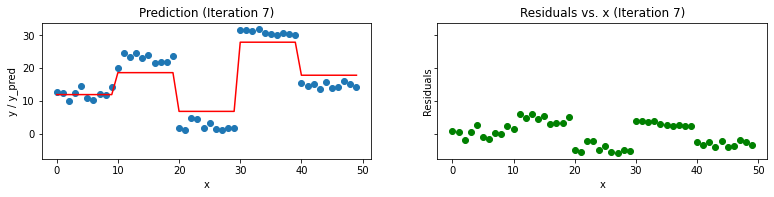

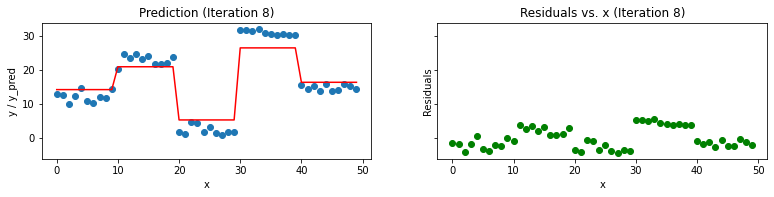

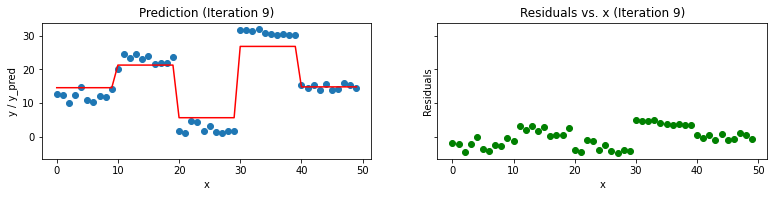

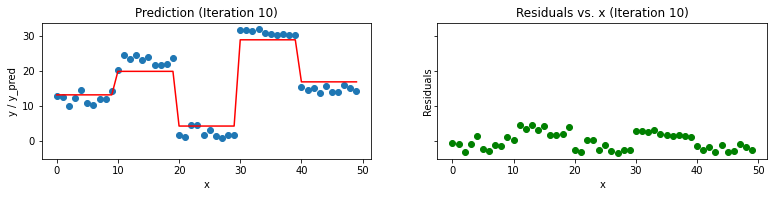

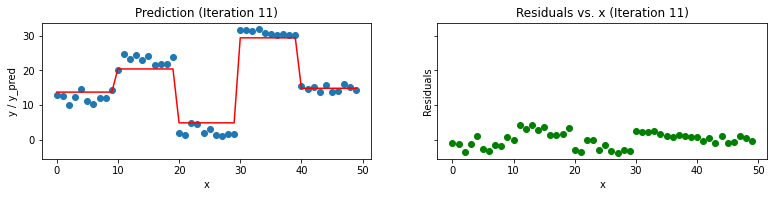

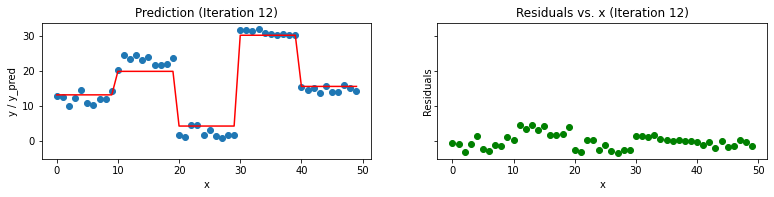

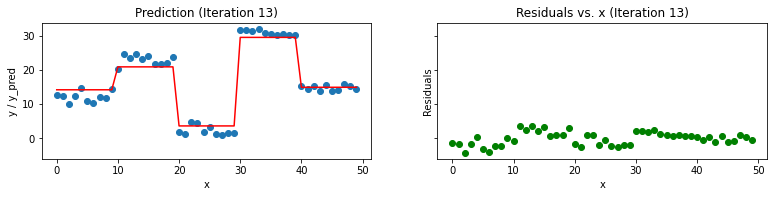

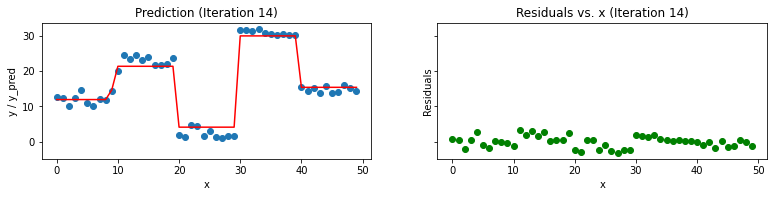

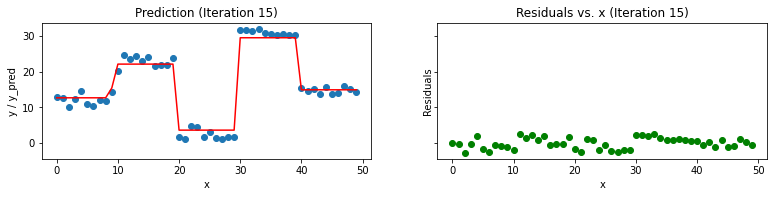

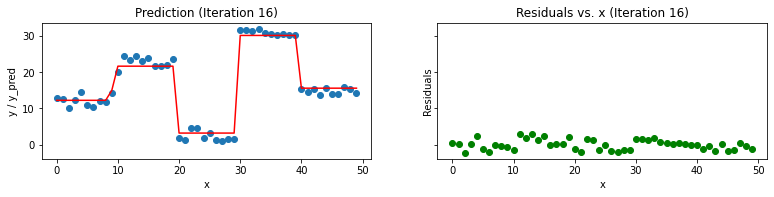

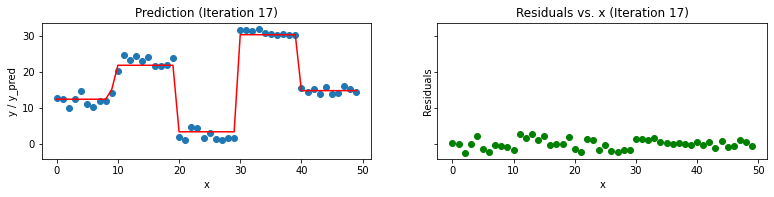

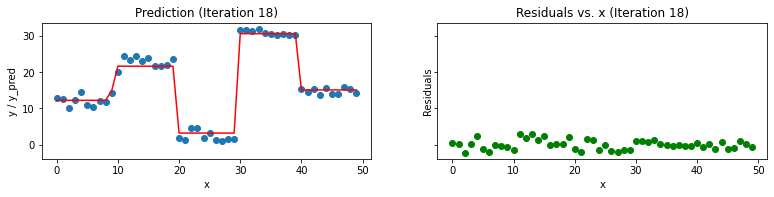

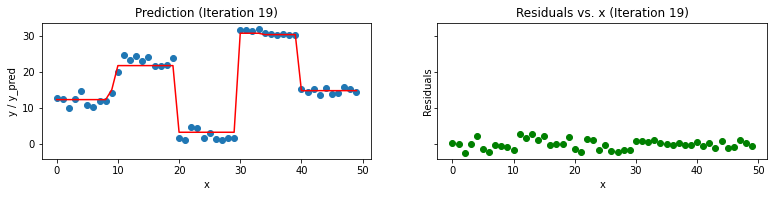

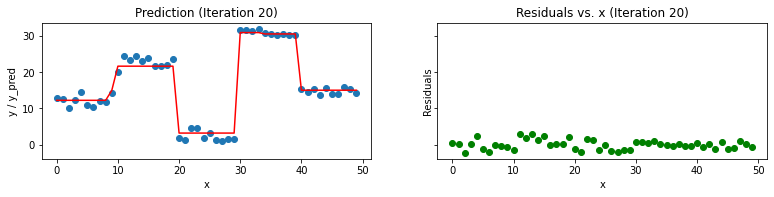

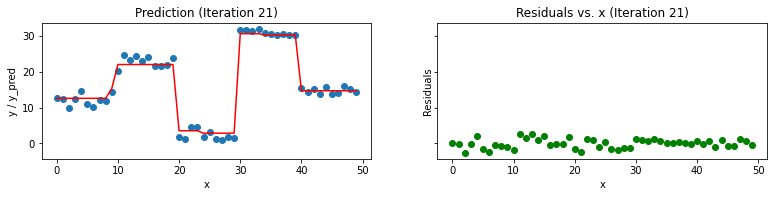

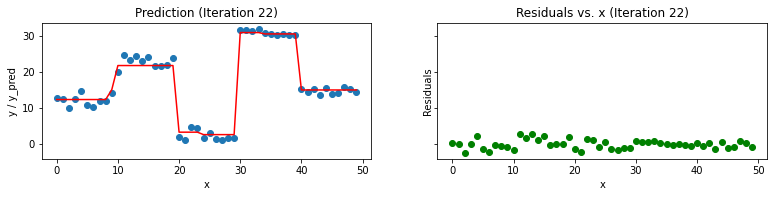

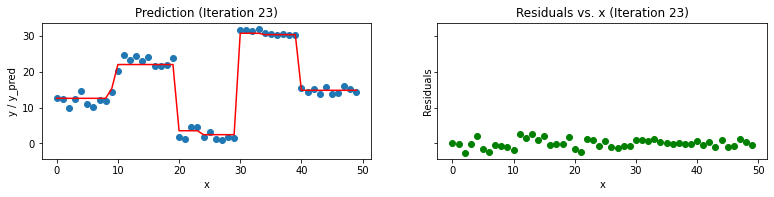

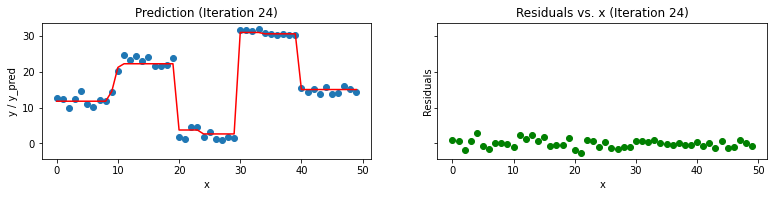

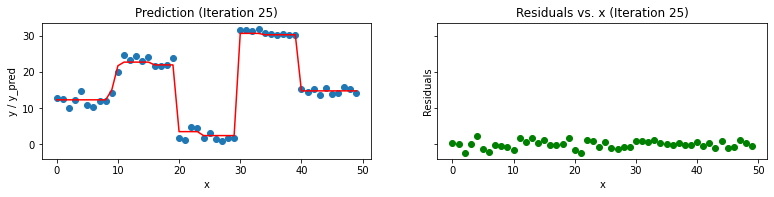

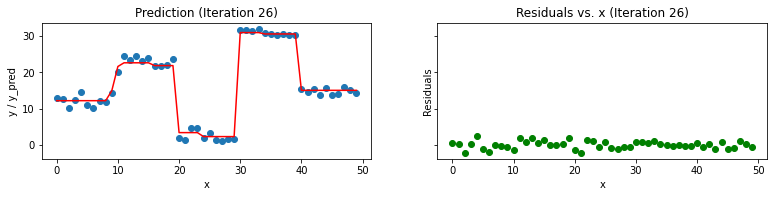

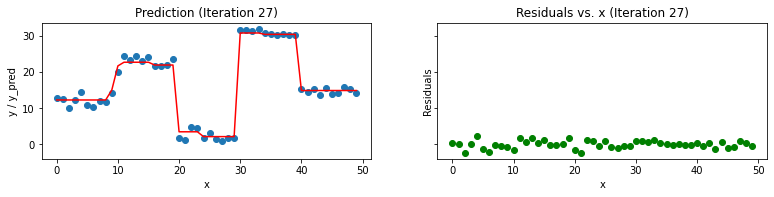

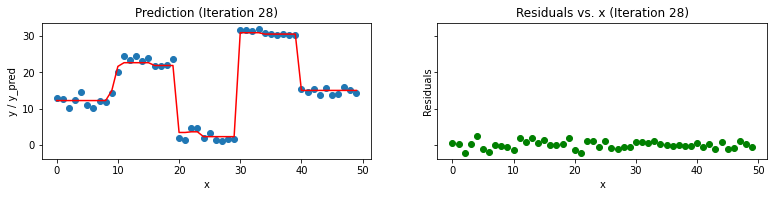

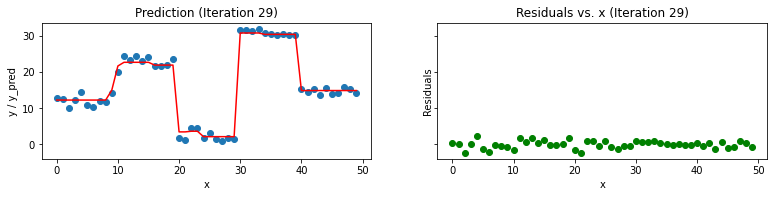

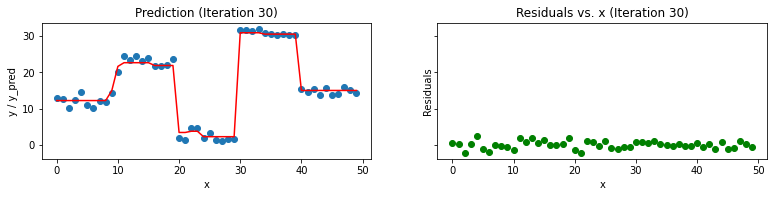

In [ ]:
xi = x # initialization of input
yi = y # initialization of target
# x,y --> use where no need to change original y
ei = 0 # initialization of error
n = len(yi)  # number of rows
predf = 0 # initial prediction 0

for i in range(30): # loop will make 30 trees (n_estimators). 
    tree = DecisionTree(xi,yi) # DecisionTree scratch code can be found in shared github/kaggle link. 
                               # It just create a single decision tree with provided min. sample leaf
    tree.find_better_split(0)  # For selected input variable, this splits (<n and >n) data so that std. deviation of 
                               # target variable in both splits is minimum as compared to all other splits
    
    r = np.where(xi == tree.split)[0][0]   #  finds index where this best split occurs
    
    left_idx = np.where(xi <= tree.split)[0] # index lhs of split
    right_idx = np.where(xi > tree.split)[0] # index rhs of split
    
    predi = np.zeros(n)
    np.put(predi, left_idx, np.repeat(np.mean(yi[left_idx]), r))  # replace left side mean y
    np.put(predi, right_idx, np.repeat(np.mean(yi[right_idx]), n-r))  # right side mean y
    
    predi = predi[:,None]  # make long vector (nx1) in compatible with y
    predf = predf + predi  # final prediction will be previous prediction value + new prediction of residual
    
    ei = y - predf  # needed originl y here as residual always from original y    
    yi = ei # update yi as residual to reloop
    
     # plotting after prediction
    xa = np.array(x.x) # column name of x is x 
    order = np.argsort(xa)
    xs = np.array(xa)[order]
    ys = np.array(predf)[order]
    
    #epreds = np.array(epred[:,None])[order]

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (13,2.5))

    ax1.plot(x,y, 'o')
    ax1.plot(xs, ys, 'r')
    ax1.set_title(f'Prediction (Iteration {i+1})')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y / y_pred')

    ax2.plot(x, ei, 'go')
    ax2.set_title(f'Residuals vs. x (Iteration {i+1})')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Residuals')